### Imports Section

In [24]:
import pint
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

### Dimensions

In [25]:
si = pint.UnitRegistry()

Temperature

In [26]:
T = (19 + constants.zero_Celsius) * si.K

Pressure

In [27]:
p = 1000 * si.hPa

Constants

In [28]:
r_star = constants.R * si.J / (si.mol * si.K)

In [29]:
Md = 28.966 * si.g / si.mol

Density

In [30]:
d = (p * Md) / (r_star * T)

In [31]:
d

<Quantity(11.9247271, 'hectopascal * gram / joule')>

In [32]:
d.check('[density]')

True

In [33]:
d = d.to_base_units()
print(f'{d.to_base_units():.2f}')

1.19 kilogram / meter ** 3


### Plotting with units

In [34]:
def eq_vapor_pressure(T):
    Tc = T - constants.zero_Celsius * si.K
    return 0.61078 * si.kPa * np.exp((17.27 * Tc) / (Tc + 237.3 * si.K))

In [35]:
si.setup_matplotlib()

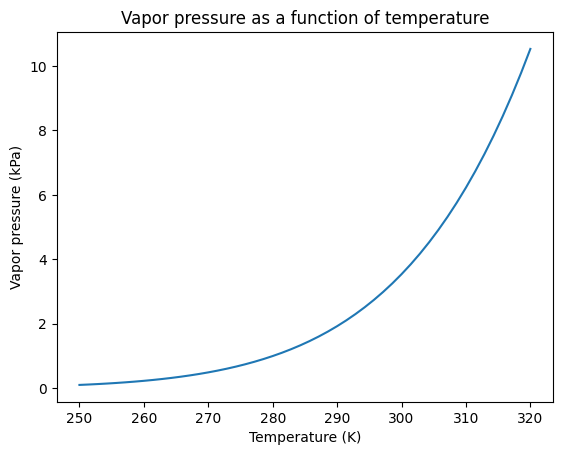

In [36]:
x_vals = np.linspace(250, 320) * si.K
y_vals = eq_vapor_pressure(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel('Temperature (K)')
plt.ylabel('Vapor pressure (kPa)')
plt.title('Vapor pressure as a function of temperature')
plt.show()


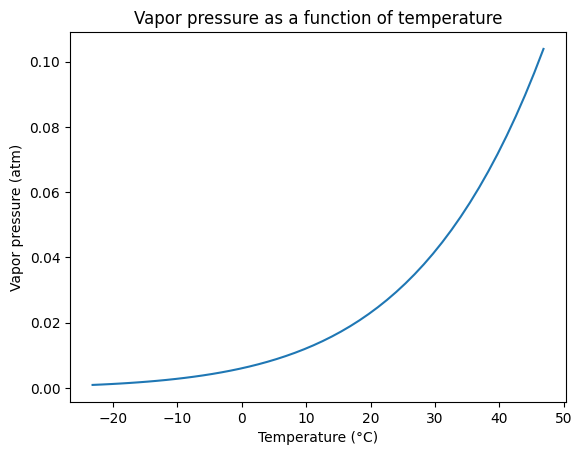

In [40]:
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals)
fig.gca().xaxis.set_units(si.celsius)
fig.gca().yaxis.set_units(si.atm)
plt.xlabel('Temperature (°C)')
plt.ylabel('Vapor pressure (atm)')
plt.title('Vapor pressure as a function of temperature')
plt.show()

### Finding boiling point of water for a given temperature

In [41]:
def bisect(*, fun, x_min, x_max, atol):
    fmin, fmax = fun(x_min), fun(x_max)
    while True:
        mid = (x_min + x_max) / 2 
        if abs(x_max - x_min) <= atol:
            break
        fmid = fun(mid)
        if (fmid * fmin > 0): 
            x_min, fmin = mid, fmid
        else:
            x_max, fmax = mid, fmid
    return mid 

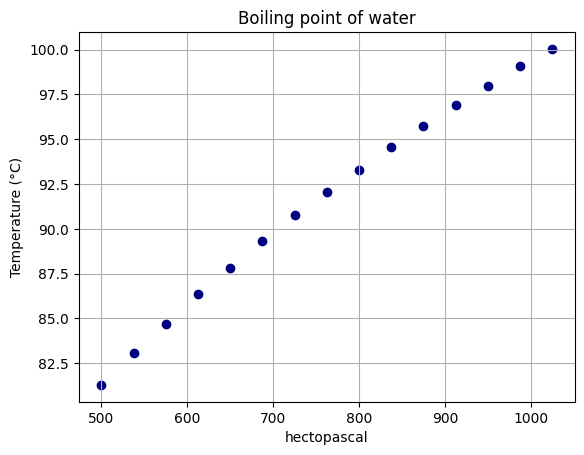

In [46]:
plt.gca().yaxis.set_units(si.celsius)
plt.title('Boiling point of water')
for p_atm in np.linspace(500, 1025, 15) * si.hPa:
    T_boil = bisect(
        fun=lambda T: eq_vapor_pressure(T) - p_atm,
        x_min=300 * si.K,
        x_max=400 * si.K,
        atol=.1 * si.K
    )
    plt.scatter(p_atm, T_boil, color='navy')

plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()